In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_color_z = pd.read_csv(os.path.join(folder_path, "features_color_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_color_mm = pd.read_csv(os.path.join(folder_path, "features_color_all_minmax.csv"))

In [3]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_color_z_cl= df_color_z.drop(columns=['filename', 'label'])

In [4]:
df_color_z_cl

,rgb_mean_r,rgb_mean_g,rgb_mean_b,hue,saturation,brightness
0,-0.233010,-0.187437,0.459739,0.173814,-0.908055,-0.258016
1,1.161184,1.758276,2.314469,3.173069,-2.630162,1.450514
2,-0.077739,-0.327588,-0.860146,-0.718451,0.927561,-0.160670
3,0.397788,0.356639,-0.399265,-0.373024,0.458052,0.338521
4,-0.030227,0.228967,-0.358905,-0.064264,0.141367,-0.045647
...,...,...,...,...,...,...
532,0.532051,0.649749,0.620998,0.893369,-0.410392,0.602273
533,-0.084669,-0.200543,-0.284272,0.014286,0.361934,-0.105928
534,0.012455,0.107445,0.180020,1.284708,-0.041958,0.114134
535,1.174102,1.542969,1.756730,2.768508,-1.294443,1.430725


In [5]:
bandwidth = estimate_bandwidth(df_color_z_cl.values, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_color_z_cl.values)
labels = ms.labels_
n_clusters = len(np.unique(labels))

unique, counts = np.unique(labels, return_counts=True)

if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(df_color_z_cl.values, labels)
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")


Auto Bandwidth: 1.775 | Clusters: 3 | Silhouette Score: 0.438


In [6]:
bandwidth_values = [1.77, 1.5, 1.57, 1.53, 1.84, 1.9, 1.98, 1.46]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_color_z_cl.values)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  
        score = silhouette_score(df_color_z_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 1.77 | Clusters: 3 | Silhouette Score: 0.437
Bandwidth: 1.50 | Clusters: 3 | Silhouette Score: 0.444
Bandwidth: 1.57 | Clusters: 3 | Silhouette Score: 0.447
Bandwidth: 1.53 | Clusters: 3 | Silhouette Score: 0.447
Bandwidth: 1.84 | Clusters: 2 | Silhouette Score: 0.497
Bandwidth: 1.90 | Clusters: 2 | Silhouette Score: 0.497
Bandwidth: 1.98 | Clusters: 2 | Silhouette Score: 0.497
Bandwidth: 1.46 | Clusters: 4 | Silhouette Score: 0.434


In [7]:
bandwidth = 1.57 #1.84
meanshift_z = MeanShift(bandwidth=bandwidth)
meanshift_z.fit(df_color_z_cl)

MeanShift(bandwidth=1.57)

In [8]:
y_true = df_color_z['label'] 
y_pred = meanshift_z.labels_     

contingency_table_z = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster mean shift'])
print(contingency_table_z)

Cluster mean shift    0   1   2
Etiqueta Real                  
higher              252   9   7
smaller             230  22  17


no sale clusteres bien repartidos de ninguna forma

In [9]:
# Reduccion de la dimensionalidad con UMAP
umap_model_z = umap.UMAP(n_neighbors=9,n_components=2, random_state=42)
X_umap_z = umap_model_z.fit_transform(df_color_z_cl)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_20332\132615623.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


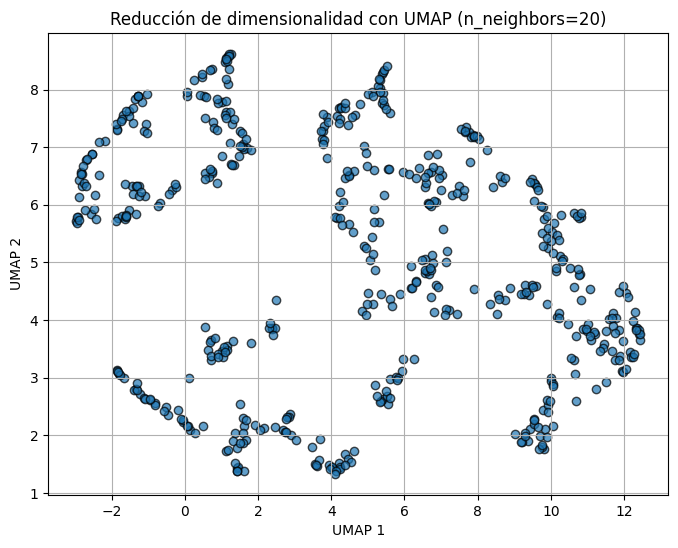

In [10]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP (n_neighbors=20)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [11]:
bandwidth = estimate_bandwidth(X_umap_z, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_umap_z)
labels = ms.labels_
n_clusters = len(np.unique(labels))

unique, counts = np.unique(labels, return_counts=True)

if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_z, labels)
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 3.016 | Clusters: 4 | Silhouette Score: 0.531


In [12]:
bandwidth_values = [1.0, 2.56, 3.4, 4, 2.49, 3.016, 3.05 ]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(X_umap_z)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_z, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 1.00 | Clusters: 20 | Silhouette Score: 0.530
Bandwidth: 2.56 | Clusters: 4 | Silhouette Score: 0.533
Bandwidth: 3.40 | Clusters: 4 | Silhouette Score: 0.513
Bandwidth: 4.00 | Clusters: 2 | Silhouette Score: 0.493
Bandwidth: 2.49 | Clusters: 5 | Silhouette Score: 0.517
Bandwidth: 3.02 | Clusters: 4 | Silhouette Score: 0.531
Bandwidth: 3.05 | Clusters: 4 | Silhouette Score: 0.531


In [13]:
bandwidth = 2.56
meanshift_z = MeanShift(bandwidth=bandwidth)
meanshift_z.fit(X_umap_z)

MeanShift(bandwidth=2.56)

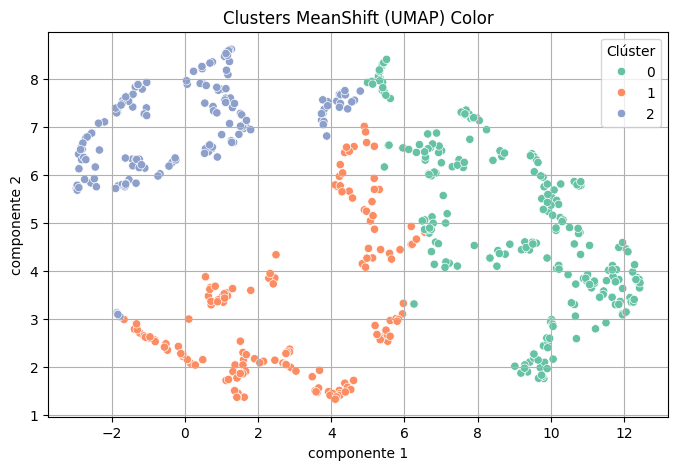

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        1
2    callo_100.png  smaller        0
3    callo_101.png  smaller        2
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        1
533   callo_96.png   higher        1
534   callo_97.png   higher        1
535   callo_98.png   higher        1
536   callo_99.png   higher        1

[537 rows x 3 columns]


In [37]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift (UMAP) Color')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_color_z['filename'],
    'label': df_color_z['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado)

In [15]:
score_z = silhouette_score(X_umap_z, labels)
print(f"Silhouette Score: {score_z:.3f}")

Silhouette Score: 0.531


In [16]:
y_true = df_color_z['label'] 
y_pred = meanshift_z.labels_     

contingency_table_z = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster mean shift'])
print(contingency_table_z)

Cluster mean shift   0   1   2   3
Etiqueta Real                     
higher              79  86  55  48
smaller             86  53  72  58


parece que no hay evidencia clara de que las características de color por sí solas separen smaller de higher,  probablmente está agrupando por patrones de color similares pero sin relacion directa con la clase smaller y higher.

In [17]:
# Reduccion de la dimensionalidad con UMAP con otros hierparmámetros
umap_model_z_2 = umap.UMAP(n_neighbors=11,n_components=2, random_state=42)
X_umap_z_2 = umap_model_z_2.fit_transform(df_color_z_cl)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_20332\1236859748.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z_2[:, 0], X_umap_z_2[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


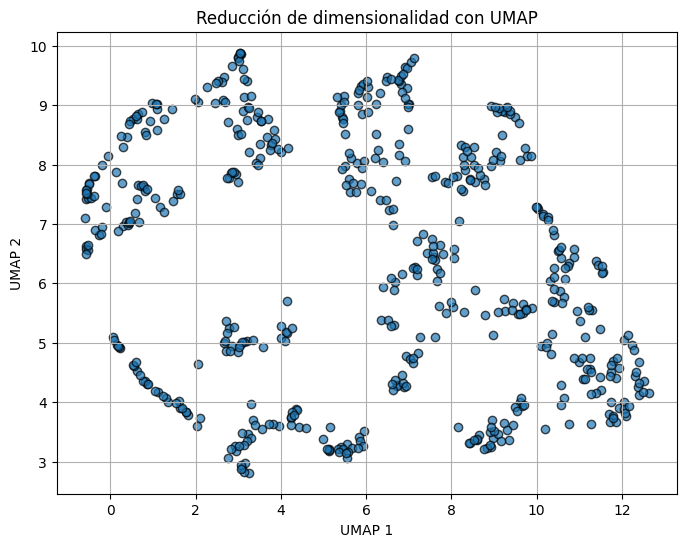

In [18]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z_2[:, 0], X_umap_z_2[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [19]:
# Estimar el bandwidth automáticamente
bandwidth_2 = estimate_bandwidth(X_umap_z_2, quantile=0.2, n_samples=500)

ms_2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_2.fit(X_umap_z_2)
labels = ms_2.labels_
n_clusters_2 = len(np.unique(labels))

unique, counts = np.unique(labels, return_counts=True)

if n_clusters_2 > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_z_2, labels)
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters_2} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth:.3f} | Clusters: {n_clusters_2} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.560 | Clusters: 4 | Silhouette Score: 0.497


In [20]:
bandwidth_values_2 = [2.56, 4, 4.3, 3.6]

for bw in bandwidth_values_2:
    ms_2 = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_2.fit(X_umap_z_2)
    labels = ms_2.labels_
    n_clusters_3 = len(np.unique(labels))
    
    if n_clusters_3 > 1:  # 
        score = silhouette_score(X_umap_z_2, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_3} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_3} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.56 | Clusters: 4 | Silhouette Score: 0.497
Bandwidth: 4.00 | Clusters: 2 | Silhouette Score: 0.480
Bandwidth: 4.30 | Clusters: 2 | Silhouette Score: 0.472
Bandwidth: 3.60 | Clusters: 3 | Silhouette Score: 0.451


In [21]:
bandwidth = 4
meanshift_z_2 = MeanShift(bandwidth=bandwidth)
meanshift_z_2.fit(X_umap_z_2)

MeanShift(bandwidth=4)

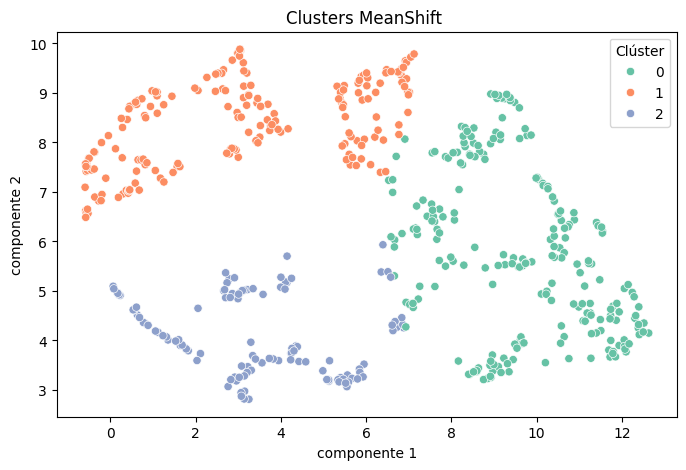

          filename    label  cluster
0      callo_1.png  smaller        0
1     callo_10.png  smaller        2
2    callo_100.png  smaller        0
3    callo_101.png  smaller        1
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        2
533   callo_96.png   higher        0
534   callo_97.png   higher        2
535   callo_98.png   higher        2
536   callo_99.png   higher        2

[537 rows x 3 columns]


In [22]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z_2[:, 0], y=X_umap_z_2[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado_3 = pd.DataFrame({
    'filename': df_color_z['filename'],
    'label': df_color_z['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado_3)

se hace lo mismo con normalizacion min-max:

In [23]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_color_mm_cl= df_color_mm.drop(columns=['filename', 'label'])

In [24]:
# Estimar el bandwidth automáticamente
bandwidth_mm = estimate_bandwidth(df_color_mm_cl.values, quantile=0.2, n_samples=500)

ms_mm = MeanShift(bandwidth=bandwidth_mm, bin_seeding=True)
ms_mm.fit(df_color_mm_cl.values)
labels = ms_mm.labels_
n_clusters_mm = len(np.unique(labels))

unique, counts = np.unique(labels, return_counts=True)

if n_clusters_mm > 1 and all(count > 1 for count in counts):
    score = silhouette_score(df_color_mm_cl.values, labels)
    print(f"Auto Bandwidth: {bandwidth_mm:.3f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_mm:.3f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 0.307 | Clusters: 3 | Silhouette Score: 0.432


In [25]:
bandwidth_values = [0.307, 0.34, 0.32, 0.29, 0.35]
for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_color_mm_cl.values)
    labels = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels))
    
    if n_clusters_mm > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_color_mm_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.31 | Clusters: 3 | Silhouette Score: 0.432
Bandwidth: 0.34 | Clusters: 2 | Silhouette Score: 0.495
Bandwidth: 0.32 | Clusters: 2 | Silhouette Score: 0.493
Bandwidth: 0.29 | Clusters: 3 | Silhouette Score: 0.433
Bandwidth: 0.35 | Clusters: 2 | Silhouette Score: 0.495


In [26]:
bandwidth_mm = 0.34
meanshift_mm = MeanShift(bandwidth=bandwidth_mm)
meanshift_mm.fit(df_color_mm_cl)

MeanShift(bandwidth=0.34)

In [27]:
y_true_mm = df_color_mm['label'] 
y_pred_mm = meanshift_mm.labels_     

contingency_table_mm = pd.crosstab(y_true_mm, y_pred_mm, rownames=['Etiqueta Real'], colnames=['Cluster mean shift'])
print(contingency_table_mm)

Cluster mean shift    0   1
Etiqueta Real              
higher              260   8
smaller             239  30


no estan bien repartidos los puntos

se reduce con umap

In [28]:
# Reduccion de la dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=13,n_components=2, random_state=42) #11 #13
X_umap_mm = umap_model_mm.fit_transform(df_color_mm_cl)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_20332\1252713735.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


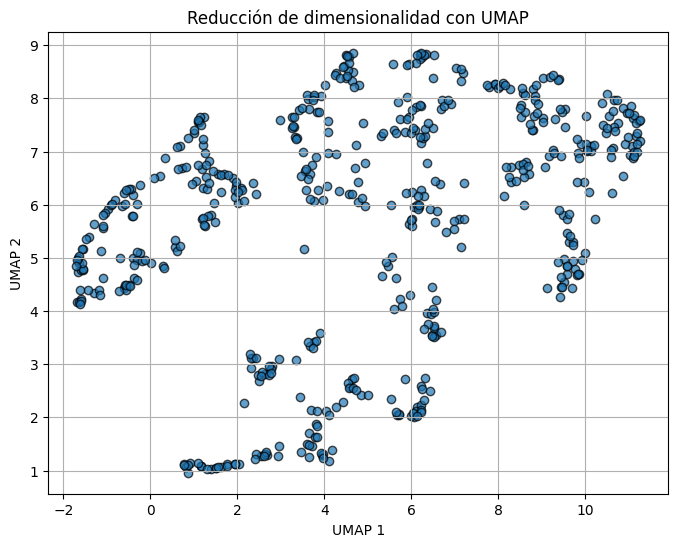

In [29]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [30]:
# Estimar el bandwidth automáticamente
bandwidth_mm = estimate_bandwidth(X_umap_mm, quantile=0.2, n_samples=500)

ms_mm = MeanShift(bandwidth=bandwidth_mm, bin_seeding=True)
ms_mm.fit(X_umap_mm)
labels = ms_mm.labels_
n_clusters_mm = len(np.unique(labels))

unique, counts = np.unique(labels, return_counts=True)

if n_clusters_mm > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_mm, labels)
    print(f"Auto Bandwidth: {bandwidth_mm:.3f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_mm:.3f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.733 | Clusters: 4 | Silhouette Score: 0.509


In [31]:
bandwidth_values_mm = [2.906, 2.95, 2.8, 3.1]

for bw in bandwidth_values_mm:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(X_umap_mm)
    labels = ms_mm.labels_
    n_clusters_mm_2 = len(np.unique(labels))
    
    if n_clusters_3 > 1:  # 
        score = silhouette_score(X_umap_mm, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm_2} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm_2} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.91 | Clusters: 4 | Silhouette Score: 0.525
Bandwidth: 2.95 | Clusters: 4 | Silhouette Score: 0.524
Bandwidth: 2.80 | Clusters: 4 | Silhouette Score: 0.525
Bandwidth: 3.10 | Clusters: 3 | Silhouette Score: 0.448


In [32]:
bandwidth_mm = 2.80
meanshift_mm = MeanShift(bandwidth=bandwidth_mm)
meanshift_mm.fit(X_umap_mm)

MeanShift(bandwidth=2.8)

In [33]:
bandwidth_mm_2 = 3.10
meanshift_mm_2 = MeanShift(bandwidth=bandwidth_mm_2)
meanshift_mm_2.fit(X_umap_mm)

MeanShift(bandwidth=3.1)

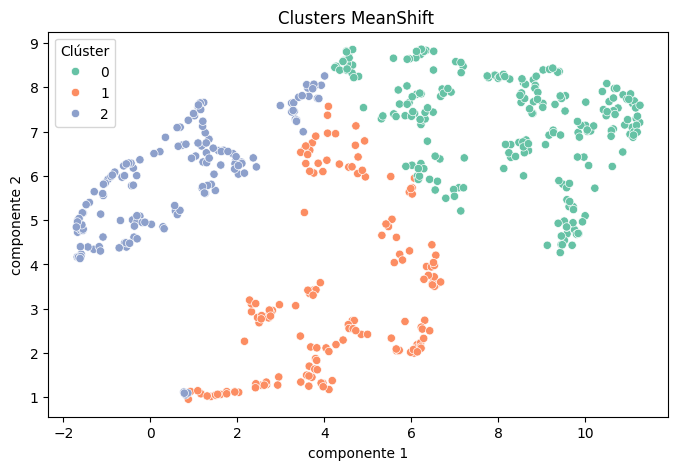

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        1
2    callo_100.png  smaller        0
3    callo_101.png  smaller        2
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        1
533   callo_96.png   higher        1
534   callo_97.png   higher        1
535   callo_98.png   higher        1
536   callo_99.png   higher        1

[537 rows x 3 columns]


In [34]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado_mm = pd.DataFrame({
    'filename': df_color_mm['filename'],
    'label': df_color_mm['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado_mm)

In [35]:
y_true_mm = df_color_mm['label'] 
y_pred_mm = meanshift_mm.labels_     

contingency_table_mm = pd.crosstab(y_true_mm, y_pred_mm, rownames=['Etiqueta Real'], colnames=['Cluster mean shift'])
print(contingency_table_mm)

Cluster mean shift   0   1   2   3   4
Etiqueta Real                         
higher              90  57  56  25  40
smaller             59  59  78  31  42


In [36]:
y_true_mm_2 = df_color_mm['label'] 
y_pred_mm_2 = meanshift_mm_2.labels_     

contingency_table_mm_2 = pd.crosstab(y_true_mm_2, y_pred_mm_2, rownames=['Etiqueta Real'], colnames=['Cluster mean shift'])
print(contingency_table_mm_2)

Cluster mean shift    0    1   2
Etiqueta Real                   
higher              120   78  70
smaller              85  104  80
